# Looking at data structures - dataframes in R

Dataframes are the fundamental data structure in R. They are essentially tables consisting of variables and observations. If we can represent your dataset as a dataframe, we're ready to start answering questions about it using R.

Let's load `mpg` dataframe contained in the `tidyverse` package:

In [24]:
library(tidyverse)
head(mpg) # visualize first lines of dataframe
cat("\n Number of rows of dataframe | Number of feautures:\n", dim(mpg),"\n"); cat("\n")
summary(mpg) # visualize descriptive stats of dataframe

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact



 Number of rows of dataframe | Number of feautures:
 234 11 



 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

This dataframe contains data about the fuel economy of cars, collected between 1999 and 2008. Specifically, it's a table containing 234 rows, and 11 columns. It's called a "tibble" `tibble`, which is just a slightly modernised version of R's original `data.frame`.

We can create our own tibbles:

In [25]:
mytibble <- tibble(
  x = 1:4, 
  y = x^2, 
  z = y + 0.1
)
mytibble

x,y,z
<int>,<dbl>,<dbl>
1,1,1.1
2,4,4.1
3,9,9.1
4,16,16.1


And also create "tribbles": they are just "transposed tibbles":

In [26]:
mytribble <- tribble(
  ~x, ~y, ~z,
  1, 4.2,"a",
  3, 9.6,"b",
  4,16.8,"c"  
)
mytribble

x,y,z
<dbl>,<dbl>,<chr>
1,4.2,a
3,9.6,b
4,16.8,c


That might be easier, depending on the situation.

## Getting variables from a dataframe

If we want to see how many different types of car there are in the dataset, we can try using `unique`

In [27]:
unique(mpg$model)

[1] "a4"                     "a4 quattro"             "a6 quattro"            
 [4] "c1500 suburban 2wd"     "corvette"               "k1500 tahoe 4wd"       
 [7] "malibu"                 "caravan 2wd"            "dakota pickup 4wd"     
[10] "durango 4wd"            "ram 1500 pickup 4wd"    "expedition 2wd"        
[13] "explorer 4wd"           "f150 pickup 4wd"        "mustang"               
[16] "civic"                  "sonata"                 "tiburon"               
[19] "grand cherokee 4wd"     "range rover"            "navigator 2wd"         
[22] "mountaineer 4wd"        "altima"                 "maxima"                
[25] "pathfinder 4wd"         "grand prix"             "forester awd"          
[28] "impreza awd"            "4runner 4wd"            "camry"                 
[31] "camry solara"           "corolla"                "land cruiser wagon 4wd"
[34] "toyota tacoma 4wd"      "gti"                    "jetta"                 
[37] "new beetle"             "passat"

There are 38 different types of cars in the dataset.

Other selection methods:

In [29]:
# select specific row
mpg[194,]

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
toyota,corolla,1.8,1999,4,auto(l3),f,24,30,r,compact


In [30]:
# select row and column
mpg[194,2]

model
<chr>
corolla


In [31]:
# select a range of rows and columns
mpg[194:198,1:4]

manufacturer,model,displ,year
<chr>,<chr>,<dbl>,<int>
toyota,corolla,1.8,1999
toyota,corolla,1.8,1999
toyota,corolla,1.8,1999
toyota,corolla,1.8,2008
toyota,corolla,1.8,2008


## Tables and barcharts in R

How many of each brand of car we have in dataframe?

One way to answer this is to make a table. Making a table of counts of each type is easy

In [42]:
table(mpg$manufacturer)


      audi  chevrolet      dodge       ford      honda    hyundai       jeep 
        18         19         37         25          9         14          8 
land rover    lincoln    mercury     nissan    pontiac     subaru     toyota 
         4          3          4         13          5         14         34 
volkswagen 
        27 

This shows us that there are 18 Audis in the dataset, 19 Chevrolets, and so on. But we might like to know the *proportion* of each type of car. We can pass the table to the R function `prop.table` to convert all these numbers into proportions:

In [43]:
prop.table(table(mpg$manufacturer))


      audi  chevrolet      dodge       ford      honda    hyundai       jeep 
0.07692308 0.08119658 0.15811966 0.10683761 0.03846154 0.05982906 0.03418803 
land rover    lincoln    mercury     nissan    pontiac     subaru     toyota 
0.01709402 0.01282051 0.01709402 0.05555556 0.02136752 0.05982906 0.14529915 
volkswagen 
0.11538462 

So, now we know that about 15.8% of the cars are Dodges, and 10.7% are Fords. It might be nicer still to represent this information as a bar chart, so we don't have to read all those numbers. This is where we get `ggplot` package.

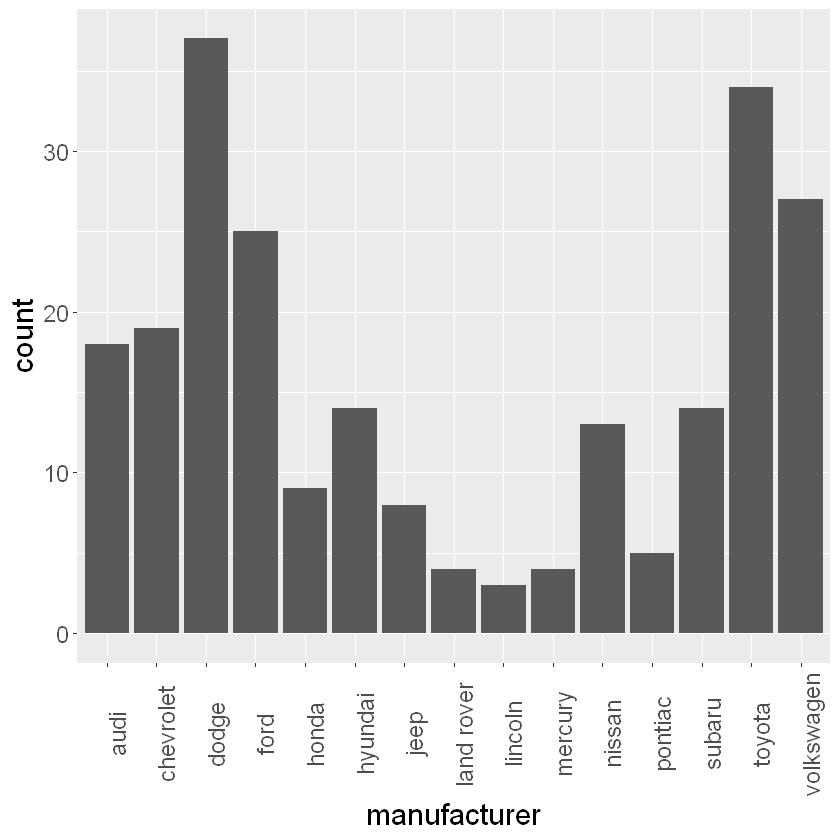

In [49]:
ggplot(mpg,aes(manufacturer)) +
        geom_bar() +
        theme(text = element_text(size = 18), axis.text.x = element_text(angle = 90))